In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("Data_Train.xlsx")
data.shape

(6019, 13)

In [3]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [100]:
#Drop New_Price
data_new = data.drop("New_Price", axis =1)
data_new.shape

(6019, 12)

In [101]:
data_new.Mileage.str.split(" ").str.get(1).value_counts()

kmpl     5951
km/kg      66
Name: Mileage, dtype: int64

In [102]:
data_new.Mileage = data_new.Mileage.str.split(" ").str.get(0)
data_new.Mileage.head()

0     26.6
1    19.67
2     18.2
3    20.77
4     15.2
Name: Mileage, dtype: object

In [103]:
data_new.Mileage.dtype

dtype('O')

In [104]:
data_new.Mileage = data_new.Mileage.astype(float)
data_new.Mileage.dtype

dtype('float64')

In [105]:
data_new[data_new.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [106]:
data_new[data_new.Name == "Toyota Prius 2009-2016 Z4"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [107]:
data_new[data_new.Name == "Mahindra E Verito D4"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.0


In [108]:
data_new[(data_new.Name.str.startswith("Mahindra") )
         & (data_new.Transmission == "Automatic" )
         & (data_new.Owner_Type == "First")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
131,Mahindra XUV500 AT W10 FWD,Jaipur,2016,54000,Diesel,Automatic,First,16.00,2179 CC,140 bhp,7.0,13.25
509,Mahindra XUV500 AT W8 FWD,Bangalore,2015,34000,Diesel,Automatic,First,16.00,2179 CC,140 bhp,7.0,13.00
796,Mahindra XUV500 W9 AT,Coimbatore,2019,19654,Diesel,Automatic,First,14.00,2179 CC,155 bhp,7.0,17.63
1399,Mahindra Ssangyong Rexton RX7,Delhi,2014,65000,Diesel,Automatic,First,11.18,2696 CC,184 bhp,7.0,10.50
1611,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,85000,Diesel,Automatic,First,11.79,2179 CC,120 bhp,7.0,6.25
1687,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49,1493 CC,100 bhp,7.0,8.37
1901,Mahindra Ssangyong Rexton RX7,Delhi,2014,62000,Diesel,Automatic,First,11.18,2696 CC,184 bhp,7.0,10.55
1944,Mahindra XUV500 AT W10 FWD,Mumbai,2016,41000,Diesel,Automatic,First,16.00,2179 CC,140 bhp,7.0,13.75
2204,Mahindra Scorpio S10 AT 4WD,Pune,2017,66988,Diesel,Automatic,First,15.40,2179 CC,120 bhp,7.0,10.00
2279,Mahindra Ssangyong Rexton RX7,Kochi,2015,67415,Diesel,Automatic,First,11.18,2696 CC,184 bhp,7.0,11.03


In [109]:
data_new[(data_new.Name.str.startswith("Toyota") )
         & (data_new.Transmission == "Automatic" )
         & (data_new.Owner_Type == "First")] 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755 CC,171.5 bhp,8.0,17.50
45,Toyota Corolla Altis G AT,Mumbai,2016,52001,Petrol,Automatic,First,14.28,1798 CC,138.03 bhp,5.0,10.11
110,Toyota Innova Crysta 2.8 ZX AT,Mumbai,2017,30000,Diesel,Automatic,First,11.36,2755 CC,171.5 bhp,7.0,19.25
235,Toyota Innova Crysta 2.8 GX AT,Kochi,2019,14165,Diesel,Automatic,First,11.36,2755 CC,171.5 bhp,7.0,19.64
341,Toyota Corolla H4,Kolkata,2008,80000,Petrol,Automatic,First,11.30,1794 CC,125 bhp,5.0,2.80
503,Toyota Fortuner 4x4 AT,Delhi,2017,25000,Diesel,Automatic,First,12.55,2982 CC,168.5 bhp,7.0,32.00
562,Toyota Innova Crysta 2.8 GX AT,Ahmedabad,2016,100200,Diesel,Automatic,First,11.36,2755 CC,171.5 bhp,7.0,17.00
585,Toyota Fortuner 4x2 AT,Mumbai,2015,43690,Diesel,Automatic,First,12.55,2982 CC,168.5 bhp,7.0,17.11
592,Toyota Fortuner 4x2 AT,Delhi,2013,71932,Diesel,Automatic,First,12.55,2982 CC,168.5 bhp,7.0,16.50
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36,2755 CC,171.5 bhp,7.0,24.82


In [110]:
value = data_new[(data_new.Name.str.startswith("Toyota") )
         & (data_new.Transmission == "Automatic" )
         & (data_new.Owner_Type == "First")] .Mileage.mean()
print(value)

data_new.loc[data_new.Name == "Toyota Prius 2009-2016 Z4","Mileage"] = value

13.066265060240955


In [111]:
data_new.Mileage.isnull().sum()

1

In [112]:
mahindra_value = data_new[(data_new.Name.str.startswith("Mahindra") )
         & (data_new.Transmission == "Automatic" )
         & (data_new.Owner_Type == "First")].Mileage.mean()
mahindra_value

14.219545454545456

In [113]:
data_new.loc[data_new.Name == "Mahindra E Verito D4","Mileage"] = mahindra_value

In [114]:
data_new.Mileage.isnull().sum()

0

In [115]:
sorted(data_new.Mileage.unique())

[0.0,
 6.4,
 7.5,
 7.81,
 7.94,
 8.0,
 8.1,
 8.2,
 8.3,
 8.45,
 8.5,
 8.6,
 8.7,
 8.77,
 9.0,
 9.1,
 9.3,
 9.43,
 9.5,
 9.52,
 9.7,
 9.74,
 9.8,
 9.9,
 10.0,
 10.1,
 10.13,
 10.2,
 10.37,
 10.4,
 10.5,
 10.6,
 10.8,
 10.9,
 10.91,
 10.93,
 10.98,
 11.0,
 11.05,
 11.07,
 11.1,
 11.18,
 11.2,
 11.25,
 11.3,
 11.33,
 11.36,
 11.4,
 11.49,
 11.5,
 11.56,
 11.57,
 11.62,
 11.68,
 11.7,
 11.72,
 11.74,
 11.78,
 11.79,
 11.8,
 11.9,
 12.0,
 12.05,
 12.07,
 12.1,
 12.19,
 12.3,
 12.35,
 12.37,
 12.39,
 12.4,
 12.5,
 12.51,
 12.55,
 12.6,
 12.62,
 12.63,
 12.65,
 12.7,
 12.8,
 12.81,
 12.83,
 12.85,
 12.9,
 12.95,
 12.97,
 12.98,
 12.99,
 13.0,
 13.01,
 13.06,
 13.066265060240955,
 13.1,
 13.14,
 13.17,
 13.2,
 13.22,
 13.24,
 13.29,
 13.33,
 13.4,
 13.44,
 13.45,
 13.49,
 13.5,
 13.53,
 13.58,
 13.6,
 13.68,
 13.7,
 13.73,
 13.8,
 13.9,
 13.93,
 14.0,
 14.02,
 14.07,
 14.1,
 14.16,
 14.2,
 14.21,
 14.219545454545456,
 14.24,
 14.28,
 14.3,
 14.33,
 14.39,
 14.4,
 14.42,
 14.45,
 14.47,
 14.49,

In [116]:
data_new[data_new.Mileage == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086 CC,null bhp,5.0,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498 CC,99 bhp,NaN,3.60
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086 CC,null bhp,5.0,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.0,1086 CC,null bhp,5.0,1.50
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968 CC,null bhp,5.0,5.45
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086 CC,null bhp,5.0,3.35
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950 CC,181.43 bhp,5.0,38.99


In [117]:
data_new[data_new.Name == "Land Rover Freelander 2 TD4 SE"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,17.50
4687,Land Rover Freelander 2 TD4 SE,Jaipur,2012,119203,Diesel,Automatic,First,0.0,2179 CC,115 bhp,5.0,16.50
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,26.00
5311,Land Rover Freelander 2 TD4 SE,Hyderabad,2012,139000,Diesel,Automatic,First,0.0,2179 CC,115 bhp,5.0,16.75


In [118]:
data_new[data_new.Name == "Mercedes-Benz C-Class Progressive C 220d"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,35.67
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,39.50
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,35.00


In [119]:
data_new.Engine = data_new.Engine.str.split(" ").str.get(0)

In [120]:
data_new.Power = data_new.Power.str.split(" ").str.get(0)

In [121]:
data_new.Engine.isnull().sum()

36

In [122]:
data_new.Power.isnull().sum()

36

In [123]:
data_new[(data_new.Engine.isnull()) & (data_new.Power.isnull())]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93


In [124]:
data_new.Seats.isnull().sum()

42

In [125]:
data_new[data_new.Name == "Honda City 1.5 GXI"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.50
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493,100,5.0,2.30
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493,100,5.0,1.10
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.85


In [126]:
data_new[data_new.Name == "Maruti Swift 1.3 VXi"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,1.75
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,NaN,NaN,NaN,1.75
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,NaN,NaN,NaN,4.24
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,2.35
5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,NaN,NaN,NaN,1.60


In [127]:

for name in data_new[(data_new.Engine.isnull()) & (data_new.Power.isnull())].Name.unique():
    print(data_new[(data_new.Name == name) & (data_new.Engine != np.nan)].loc[:,["Name","Engine","Power","Seats"]])

                    Name Engine Power  Seats
194   Honda City 1.5 GXI    NaN   NaN    NaN
1385  Honda City 1.5 GXI    NaN   NaN    NaN
3305  Honda City 1.5 GXI   1493   100    5.0
4767  Honda City 1.5 GXI   1493   100    5.0
5270  Honda City 1.5 GXI    NaN   NaN    NaN
                      Name Engine Power  Seats
208   Maruti Swift 1.3 VXi    NaN   NaN    NaN
733   Maruti Swift 1.3 VXi    NaN   NaN    NaN
2335  Maruti Swift 1.3 VXi    NaN   NaN    NaN
2668  Maruti Swift 1.3 VXi    NaN   NaN    NaN
3404  Maruti Swift 1.3 VXi    NaN   NaN    NaN
5015  Maruti Swift 1.3 VXi    NaN   NaN    NaN
                              Name Engine Power  Seats
749   Land Rover Range Rover 3.0 D    NaN   NaN    NaN
4152  Land Rover Range Rover 3.0 D    NaN   NaN    NaN
                   Name Engine Power  Seats
1294  Honda City 1.3 DX    NaN   NaN    NaN
                      Name Engine Power  Seats
1327  Maruti Swift 1.3 ZXI    NaN   NaN    NaN
                                              Name Eng

In [128]:
data_new.Seats.mode()

0    5.0
dtype: float64

In [129]:
data_new[(data_new.Name == "Honda City 1.5 GXI") & (data_new.Engine.isnull())].loc[:,"Engine"] = data_new[(data_new.Name == "Honda City 1.5 GXI") & (~data_new.Engine.isnull())].iloc[0].Engine

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [130]:
data_new[(data_new.Name == "Honda City 1.5 GXI") & (~data_new.Engine.isnull())].iloc[0][["Engine","Power","Seats"]]

Engine    1493
Power      100
Seats        5
Name: 3305, dtype: object

In [131]:
data_new[(data_new.Name == "Honda City 1.5 GXI")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.50
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493,100,5.0,2.30
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493,100,5.0,1.10
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.85


In [132]:
data_new[(data_new.Name == "Honda City 1.5 GXI")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.50
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493,100,5.0,2.30
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493,100,5.0,1.10
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,1.85


In [133]:
data_new.loc[(data_new.Name == "Honda City 1.5 GXI") & (data_new.Engine.isnull()), "Engine"] = 1493.0

In [134]:
data_new.loc[(data_new.Name == "Honda City 1.5 GXI")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1493,NaN,NaN,2.95
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,1493,NaN,NaN,1.50
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493,100,5.0,2.30
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493,100,5.0,1.10
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,1493,NaN,NaN,1.85


In [135]:
data_new.loc[(data_new.Name == "Honda City 1.5 GXI") & (data_new.Power.isnull()), "Power"] = 100
data_new.loc[(data_new.Name == "Honda City 1.5 GXI") & (data_new.Seats.isnull()), "Seats"] = 5

In [136]:
data_new.loc[(data_new.Name == "Honda City 1.5 GXI")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1493,100,5.0,2.95
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,1493,100,5.0,1.50
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493,100,5.0,2.30
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493,100,5.0,1.10
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,1493,100,5.0,1.85


In [137]:
data_new.loc[(data_new.Name == "Toyota Etios Liva V") & (data_new["Engine"].isnull()), "Engine"] = 1197.0

In [138]:
data_new.loc[(data_new.Name == "Toyota Etios Liva V") & (data_new["Power"].isnull()), "Power"] = 78.9
data_new.loc[(data_new.Name == "Toyota Etios Liva V") & (data_new["Seats"].isnull()), "Seats"] = 5.0

In [139]:
data_new.loc[(data_new.Name == "Toyota Etios Liva V") & (~data_new.Engine.isnull()), "Engine"]

2264    1197
4138    1197
Name: Engine, dtype: object

In [140]:
data_new.loc[(data_new.Name == "Toyota Etios Liva V")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,Second,18.30,1197,78.9,5.0,2.95
4138,Toyota Etios Liva V,Mumbai,2013,8950,Petrol,Manual,First,17.71,1197,78.9,5.0,3.55


In [141]:
data_new.loc[(data_new.Name == "Honda Jazz Select Edition") & (data_new["Engine"].isnull()), "Engine"] = 1198.0
data_new.loc[(data_new.Name == "Honda Jazz Select Edition") & (data_new["Power"].isnull()), "Power"] = 88.8
data_new.loc[(data_new.Name == "Honda Jazz Select Edition") & (data_new["Seats"].isnull()), "Seats"] = 5.0

In [142]:
data_new.loc[(data_new.Name == "Honda Jazz Select Edition")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.7,1198,88.8,5.0,1.99
4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,1198,88.8,5.0,3.15


In [143]:
data_new.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               31
Power                31
Seats                37
Price                 0
dtype: int64

In [144]:
data_new.loc[data_new.Name.str.startswith("Maruti Swift")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
12,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.20,1248,74,5.0,5.60
17,Maruti Swift DDiS VDI,Jaipur,2017,25000,Diesel,Manual,First,28.40,1248,74,5.0,5.99
51,Maruti Swift LDI,Delhi,2014,52000,Diesel,Manual,First,22.90,1248,74,5.0,4.25
52,Maruti Swift Ldi BSIV,Kolkata,2014,53000,Diesel,Manual,First,17.80,1248,75,5.0,3.30
53,Maruti Swift VDI,Delhi,2013,65650,Diesel,Manual,First,28.40,1248,74,5.0,3.85
80,Maruti Swift VDI,Jaipur,2012,95100,Diesel,Manual,First,22.90,1248,74,5.0,3.75
142,Maruti Swift VVT VXI,Kochi,2016,34204,Petrol,Manual,First,22.00,1197,81.80,5.0,5.43
151,Maruti Swift VDI,Chennai,2016,35000,Diesel,Manual,First,22.90,1248,74,5.0,6.25
162,Maruti Swift VXI Optional,Ahmedabad,2017,24005,Petrol,Manual,First,20.40,1197,81.80,5.0,6.20
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11


In [145]:
#All maruti Swift have 5 seats

data_new.loc[(data_new.Name.str.startswith("Maruti Swift")) & (data_new.Fuel_Type == "Petrol")].Engine.value_counts()

1197    83
1298    33
Name: Engine, dtype: int64

In [146]:
data_new.loc[data_new.Name.str.startswith("Maruti Swift")].Power.mode()[0]

'74'

In [147]:
data_new.loc[data_new.Name.str.startswith("Maruti Swift")].Seats.value_counts()

5.0    343
Name: Seats, dtype: int64

In [148]:
data_new.loc[(data_new.Name.str.startswith("Maruti Swift")) & (data_new["Seats"].isnull()), "Seats"] = 5.0

In [149]:
data_new.loc[data_new.Name.str.startswith("BMW")].Seats.value_counts()

5.0    239
4.0     16
7.0      5
2.0      2
Name: Seats, dtype: int64

In [150]:
data_new.loc[data_new.Name.str.startswith("BMW")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995,190,5.0,18.55
86,BMW 5 Series 2003-2012 525d,Delhi,2011,75000,Diesel,Automatic,Second,16.73,1995,218,5.0,13.90
113,BMW 3 Series 320d Luxury Line,Mumbai,2015,56087,Diesel,Automatic,First,22.69,1995,190,5.0,20.75
118,BMW 5 Series 2010-2013 525i,Mumbai,2009,128000,Petrol,Automatic,First,10.80,2497,215,5.0,7.00
137,BMW 1 Series 118d Base,Coimbatore,2015,31821,Diesel,Automatic,First,20.58,1995,143,5.0,17.22
149,BMW 3 Series Luxury Line,Mumbai,2014,48000,Diesel,Automatic,First,21.76,1995,190,5.0,26.50
168,BMW X5 xDrive 30d,Mumbai,2015,41000,Diesel,Automatic,First,15.30,2993,258,5.0,45.00
182,BMW 5 Series 520d Luxury Line,Hyderabad,2014,51000,Diesel,Automatic,First,22.48,1995,190,5.0,33.50
247,BMW X1 sDrive20d,Ahmedabad,2014,82002,Diesel,Automatic,First,17.05,1995,184,5.0,18.50
271,BMW X3 xDrive30d M Sport,Coimbatore,2017,51982,Diesel,Automatic,First,16.55,2993,258,5.0,45.77


In [151]:
data_new[(data_new.Engine.isnull())].Name.unique()

array(['Maruti Swift 1.3 VXi', 'Land Rover Range Rover 3.0 D',
       'Honda City 1.3 DX', 'Maruti Swift 1.3 ZXI',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Maruti Swift 1.3 LXI', 'Hyundai Santro LP zipPlus',
       'Maruti Swift 1.3 VXI ABS', 'BMW 5 Series 520d Sedan',
       'Hyundai Santro GLS II - Euro II', 'Maruti Wagon R Vx',
       'Honda CR-V AT With Sun Roof', 'Fiat Punto 1.3 Emotion',
       'Hyundai Santro Xing XG', 'Fiat Punto 1.2 Dynamic',
       'Fiat Punto 1.4 Emotion'], dtype=object)

In [152]:
for name in data_new[(data_new.Engine.isnull())].Name.unique():
    
    start_name = name.split()[0] +" "+ name.split()[1]
    print(start_name)
    
    engine_mode = data_new.loc[data_new.Name.str.startswith(start_name)].Engine.mode()[0]
    power_mode = data_new.loc[data_new.Name.str.startswith(start_name)].Power.mode()[0]
    seats_mode = data_new.loc[data_new.Name.str.startswith(start_name)].Seats.mode()[0]
    print(engine_mode,power_mode,seats_mode)
    
    data_new.loc[(data_new.Name.str.startswith(start_name)) & (data_new["Engine"].isnull()), "Engine"] = engine_mode
    data_new.loc[(data_new.Name.str.startswith(start_name)) & (data_new["Power"].isnull()), "Power"] = power_mode
    data_new.loc[(data_new.Name.str.startswith(start_name)) & (data_new["Seats"].isnull()), "Seats"] = seats_mode

Maruti Swift
1248 74 5.0
Land Rover
2179 187.7 5.0
Honda City
1497 118 5.0
Maruti Swift
1248 74 5.0
Land Rover
2179 187.7 5.0
Maruti Swift
1248 74 5.0
Hyundai Santro
1086 null 5.0
Maruti Swift
1248 74 5.0
BMW 5
1995 190 5.0
Hyundai Santro
1086 null 5.0
Maruti Wagon
998 67.1 5.0
Honda CR-V
2354 152 5.0
Fiat Punto
1172 67 5.0
Hyundai Santro
1086 null 5.0
Fiat Punto
1172 67 5.0
Fiat Punto
1172 67 5.0


In [153]:
data_new.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                5
Price                0
dtype: int64

In [154]:
data_new[data_new.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498,99,NaN,3.60
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061,null,NaN,1.50
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953,null,NaN,7.00
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061,null,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061,null,NaN,1.75


In [155]:
data_new.Power.unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', 'null', '132',
       '86.7', '73.94', '117.3', '218', '168.5', '89.84', '110', '90',
       '82.85', '67', '241.4', '35', '270.9', '126.32', '73', '130',
       '100.6', '150', '75.94', '215', '107.3', '37.48', '120', '178',
       '152', '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171',
       '76.8', '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86',
       '112', '88.73', '57.6', '157.75', '102.5', '201.1', '83.1',
       '6

In [156]:
data_new[data_new.Power == "null"].shape

(114, 12)

In [157]:
data_new[data_new.Power == "null"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399,null,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086,null,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086,null,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086,null,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086,null,5.0,1.67
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.80,1248,null,5.0,4.10
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086,null,5.0,0.95
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.00,1086,null,5.0,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.00,1086,null,5.0,1.50
308,Maruti Swift VDI BSIV,Kolkata,2011,60020,Diesel,Manual,First,17.80,1248,null,5.0,2.50


In [158]:
for name in data_new[data_new.Power == "null"].Name.unique():
    start_name = name.split()[0] 
    print(data_new.loc[(data_new.Name.str.startswith(start_name)) & (data_new.Power == "null"),"Name"])
    print("----------------")

76             Ford Fiesta 1.4 SXi TDCi
472     Ford Fiesta 1.6 SXI ABS Duratec
3290           Ford Fiesta 1.4 SXi TDCi
3800        Ford Endeavour Hurricane LE
5438        Ford Endeavour XLT TDCi 4X4
Name: Name, dtype: object
----------------
79                       Hyundai Santro Xing XL
89                       Hyundai Santro Xing XO
120        Hyundai Santro Xing XL eRLX Euro III
143         Hyundai Santro Xing XO eRLX Euro II
245         Hyundai Santro Xing XO eRLX Euro II
262                      Hyundai Santro Xing XL
307                      Hyundai Santro Xing XL
386        Hyundai Santro Xing XL eRLX Euro III
428         Hyundai Santro Xing XO eRLX Euro II
443               Hyundai Santro GLS I - Euro I
575                      Hyundai Santro Xing XO
631                   Hyundai Santro LS zipPlus
647                      Hyundai Santro Xing XP
748                      Hyundai Santro Xing XO
1153       Hyundai Santro Xing XL eRLX Euro III
1271             Hyundai Santro GLS I

79                       Hyundai Santro Xing XL
89                       Hyundai Santro Xing XO
120        Hyundai Santro Xing XL eRLX Euro III
143         Hyundai Santro Xing XO eRLX Euro II
245         Hyundai Santro Xing XO eRLX Euro II
262                      Hyundai Santro Xing XL
307                      Hyundai Santro Xing XL
386        Hyundai Santro Xing XL eRLX Euro III
428         Hyundai Santro Xing XO eRLX Euro II
443               Hyundai Santro GLS I - Euro I
575                      Hyundai Santro Xing XO
631                   Hyundai Santro LS zipPlus
647                      Hyundai Santro Xing XP
748                      Hyundai Santro Xing XO
1153       Hyundai Santro Xing XL eRLX Euro III
1271             Hyundai Santro GLS I - Euro II
1419                     Hyundai Santro Xing XL
1857                          Hyundai Santro DX
2096                  Hyundai Santro LP zipPlus
2130             Hyundai Santro GLS I - Euro II
2343                          Hyundai Sa

In [159]:
data_new.loc[data_new.Name =="Smart Fortwo CDI AT","Power"] = data_new[data_new.Seats == 2.0].Power.mode()[0]
data_new[data_new.Name =="Smart Fortwo CDI AT"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799,306,2.0,3.0


In [160]:
for name in data_new[data_new.Power == "null"].Name.unique():
    
    start_name = name.split()[0]
    print(start_name)
    
    power_mode = data_new.loc[(data_new.Name.str.startswith(start_name)) & ~(data_new.Power == "null")].Power.mode()[0]
    print(power_mode)
    
    data_new.loc[(data_new.Name.str.startswith(start_name)) & (data_new["Power"] == "null"), "Power"] = power_mode

Ford
68
Hyundai
78.9
Hyundai
78.9
Hyundai
78.9
Hyundai
78.9
Maruti
74
Volkswagen
73.9
Hyundai
78.9
Ford
68
Hyundai
78.9
Hyundai
78.9
Tata
74
Toyota
102
Porsche
300
Toyota
102
Toyota
102
Hyundai
78.9
Fiat
67
Maruti
74
Chevrolet
79.4
Mahindra
140
Nissan
84.8
Hyundai
78.9
Mercedes-Benz
170
Mahindra
140
Hyundai
78.9
Maruti
74
Toyota
102
Porsche
300
Hyundai
78.9
Maruti
74
Hyundai
78.9
Hyundai
78.9
Hyundai
78.9
Hyundai
78.9
Hyundai
78.9
Nissan
84.8
Honda
98.6
Maruti
74
Ford
68
Audi
174.33
Maruti
74
Hyundai
78.9
Maruti
74
Fiat
67
Maruti
74
Hyundai
78.9
Hyundai
78.9
Ford
68
Hyundai
78.9
Toyota
102
Skoda
103.52
Mahindra
140


In [161]:
data_new[data_new.Power == "null"].Name.unique()

array([], dtype=object)

In [162]:
data_new.Power.value_counts()

74        273
78.9      160
98.6      132
140       126
73.9      126
67.1      108
67.04     107
82        101
88.5      100
117.3      93
118        91
121.3      88
190        84
170        79
126.2      78
88.7       75
70         75
86.8       74
80         74
174.33     72
102        72
81.86      71
103.6      69
81.83      68
68         67
68.05      61
85.8       59
184        58
120        57
88.8       57
         ... 
178.4       1
226.6       1
80.9        1
181.43      1
123.37      1
48.21       1
168         1
362.9       1
261         1
340         1
112.4       1
152.88      1
333         1
201         1
550         1
552         1
270.88      1
135.1       1
89.75       1
181.04      1
61          1
175.67      1
488.1       1
74.93       1
236         1
120.33      1
192         1
83.11       1
301.73      1
421         1
Name: Power, Length: 374, dtype: int64

In [163]:
data_new[data_new.Seats == 2.0].Power

134     362.07
557      207.8
693        306
798        306
915        306
926        300
1078       265
1288     207.8
2095    362.07
2305       300
4691       421
4722     387.3
4893       306
5294       306
5781       560
5919     488.1
Name: Power, dtype: object

In [164]:
data_new.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                5
Price                0
dtype: int64

In [165]:
data_new[data_new.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498,99,NaN,3.60
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061,74,NaN,1.50
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953,68,NaN,7.00
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061,74,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061,74,NaN,1.75


In [166]:
data_new[data_new.Name == "Ford Figo Diesel"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498,99,NaN,3.6


In [167]:
data_new[data_new.Name == "Maruti Estilo LXI"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061,74,NaN,1.50
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061,74,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061,74,NaN,1.75


In [168]:
data_new[data_new.Name == "Ford Endeavour Hurricane LE"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953,68,NaN,7.0


In [169]:
data_new.loc[data_new.Seats.isnull(),"Seats"] = 5.0
data_new.Seats.isnull().sum()

0

In [170]:
data_new[data_new.Mileage==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179,115,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950,194,5.0,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,78.9,5.0,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1493,100,5.0,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498,99,5.0,3.60
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086,78.9,5.0,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.0,1086,78.9,5.0,1.50
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968,73.9,5.0,5.45
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086,78.9,5.0,3.35
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950,181.43,5.0,38.99


In [171]:
data_new.groupby(by = "Fuel_Type").mean().Mileage

Fuel_Type
CNG         25.418036
Diesel      18.620484
Electric    13.642905
LPG         19.385000
Petrol      17.415204
Name: Mileage, dtype: float64

In [172]:
data_new.groupby(by = "Owner_Type").mean().Mileage

Owner_Type
First             18.459451
Fourth & Above    12.322222
Second            16.852810
Third             15.347699
Name: Mileage, dtype: float64

In [173]:
data_new.groupby(by = "Transmission").mean().Mileage

Transmission
Automatic    15.717259
Manual       19.100177
Name: Mileage, dtype: float64

In [174]:
data_new.loc[~(data_new.Mileage == 0)].groupby(by = ["Owner_Type","Fuel_Type"]).mean().Mileage

Owner_Type      Fuel_Type
First           CNG          25.890000
                Diesel       19.039092
                Electric     13.642905
                LPG          20.150000
                Petrol       17.962530
Fourth & Above  Diesel       13.575000
                Petrol       14.150000
Second          CNG          24.136000
                Diesel       17.565418
                LPG          16.325000
                Petrol       16.688297
Third           CNG          17.000000
                Diesel       16.683023
                Petrol       15.383385
Name: Mileage, dtype: float64

In [175]:
Mileage_dict = {"First CNG":25.89, 
                "First Diesel":19.04, 
                "First Electric":13.64,
                "First LPG":20.15,
                "First Petrol":17.96,
                "Fourth & Above Diesel":13.57,
                "Fourth & Above Petrol":14.15,
                "Fourth & Above CNG":12.32,
                "Fourth & Above LPG":12.32,
                "Fourth & Above Electric":12.32,
                "Second CNG":24.13,
                "Second Diesel":17.56,
                "Second LPG":16.32, 
                "Second Petrol":16.68, 
                "Second Electric":16.85,
                "Third CNG":17.00,
                "Third Diesel":16.68,
                "Third Petrol":15.38,
                "Third LPG":15.34,
                "Third Electric":15.34
               }

In [176]:
#data_new.loc[(data_new.Mileage == 0)
             #&(data_new.Owner_Type == "First")
             #&(data_new.Fuel_Type == "CNG"),"Mileage"] = Mileage_dict.first_cng


for owner_type in data_new.Owner_Type.unique():
    for fuel_type in data_new.Fuel_Type.unique():
        type = owner_type + " "+ fuel_type
        print(type)
        data_new.loc[(data_new.Mileage == 0)
             &(data_new.Owner_Type == owner_type)
             &(data_new.Fuel_Type == fuel_type),"Mileage"] = Mileage_dict[type]



First CNG
First Diesel
First Petrol
First LPG
First Electric
Second CNG
Second Diesel
Second Petrol
Second LPG
Second Electric
Fourth & Above CNG
Fourth & Above Diesel
Fourth & Above Petrol
Fourth & Above LPG
Fourth & Above Electric
Third CNG
Third Diesel
Third Petrol
Third LPG
Third Electric


In [177]:
data_new[data_new.Mileage == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [178]:
data_new.Power = data_new.Power.astype(float)
data_new.Engine = data_new.Engine.astype(float)

In [179]:
for col in ["Fuel_Type","Owner_Type","Transmission"]:
    print(data_new[col].value_counts())

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64


In [180]:
data_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [181]:
data_new.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

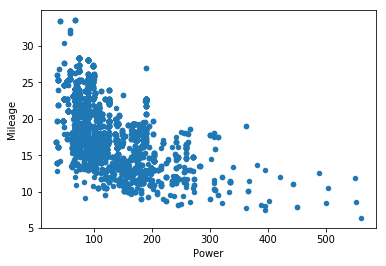

In [182]:
data_new.plot("Power","Mileage", kind = "scatter")

In [183]:
data_new.replace(["Hyderabad","Kochi","Coimbatore","Bangalore","Chennai"],"South", inplace = True)

In [184]:
data_new.replace(["Mumbai","Pune","Ahmedabad","Delhi","Jaipur","Kolkata"],"North", inplace = True)

In [185]:
data_new.Location.unique()

array(['North', 'South'], dtype=object)

In [186]:
data_new.Location.value_counts()

North    3138
South    2881
Name: Location, dtype: int64

In [258]:
data_mod = pd.get_dummies(data_new,columns = ["Location","Fuel_Type","Transmission","Owner_Type"])
data_mod.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_North,Location_South,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,...,0,0,0,0,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,...,1,0,0,0,0,1,1,0,0,0
2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,...,0,0,0,1,0,1,1,0,0,0
3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,...,1,0,0,0,0,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,...,1,0,0,0,1,0,0,0,1,0


In [259]:
data_mod.dtypes

Name                          object
Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_North                 uint8
Location_South                 uint8
Fuel_Type_CNG                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Automatic         uint8
Transmission_Manual            uint8
Owner_Type_First               uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [260]:
data_mod.Name = data_new.Name.str.split(" ").str.get(0)

In [261]:
data_mod.Name.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [262]:
list = [name for name in data_mod.Name.unique() if name not in ['Maruti','Hyundai','Honda','Toyota','Volkswagen','Mercedes-Benz','Ford']]
list

['Audi',
 'Nissan',
 'Tata',
 'Land',
 'Mitsubishi',
 'Renault',
 'BMW',
 'Mahindra',
 'Porsche',
 'Datsun',
 'Jaguar',
 'Volvo',
 'Chevrolet',
 'Skoda',
 'Mini',
 'Fiat',
 'Jeep',
 'Smart',
 'Ambassador',
 'Isuzu',
 'ISUZU',
 'Force',
 'Bentley',
 'Lamborghini']

In [263]:
data_mod.replace(list,"Others",inplace=True)

In [264]:
data_mod.Name.value_counts()

Others           1749
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Name: Name, dtype: int64

In [265]:
data_mod = pd.get_dummies(data_mod, columns=["Name"])
data_mod.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_North,Location_South,Fuel_Type_CNG,...,Owner_Type_Second,Owner_Type_Third,Name_Ford,Name_Honda,Name_Hyundai,Name_Maruti,Name_Mercedes-Benz,Name_Others,Name_Toyota,Name_Volkswagen
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [266]:
data_mod.shape

(6019, 28)

In [267]:
data_mod.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_North', 'Location_South', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
       'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Others', 'Name_Toyota',
       'Name_Volkswagen'],
      dtype='object')

In [268]:
data_mod.drop(['Location_South','Fuel_Type_Electric','Transmission_Manual','Owner_Type_Fourth & Above','Name_Others' ], axis =1, inplace=True)
data_mod.shape

(6019, 23)

In [269]:
data_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,North,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,North,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,South,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,South,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,South,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [270]:
data_new.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

## Data insights

In [271]:
import matplotlib.pyplot as plt
%matplotlib inline

In [272]:
import seaborn as sns

In [273]:
data_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,North,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,North,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,South,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,South,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,South,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


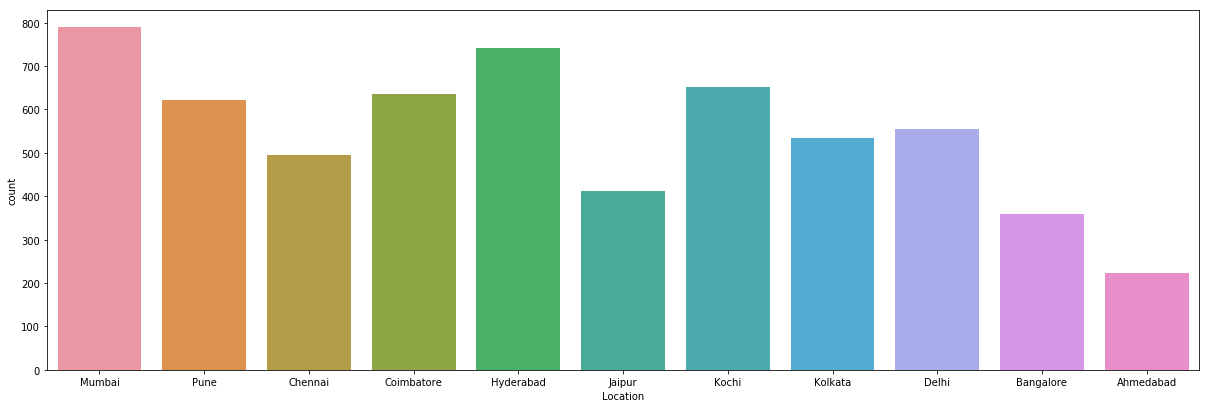

In [274]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_axes([1,1,1,1])

sns.countplot(data.Location, ax=ax)

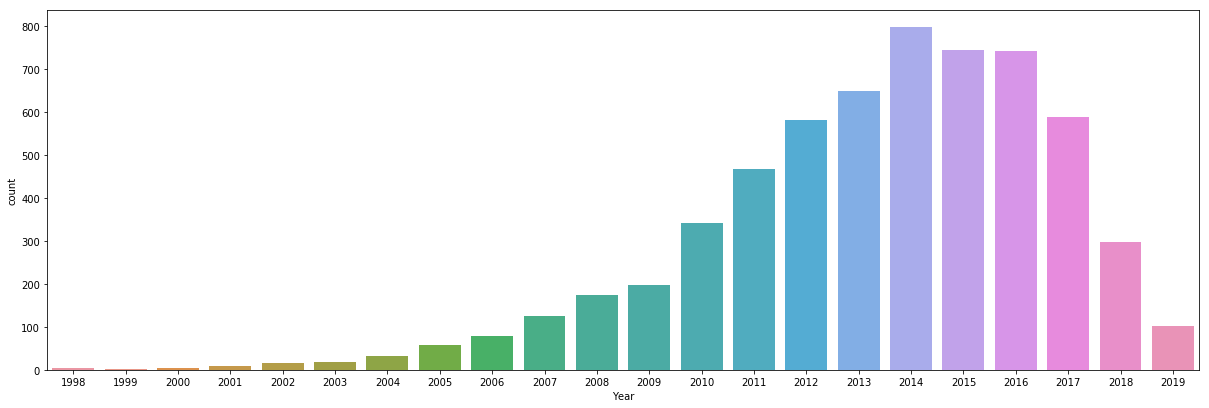

In [275]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_axes([1,1,1,1])
sns.countplot(data.Year, ax = ax)

In [276]:
data.groupby(by = ["Owner_Type"]).mean().Kilometers_Driven

Owner_Type
First              55366.782106
Fourth & Above    135759.222222
Second             71693.203512
Third              88695.469027
Name: Kilometers_Driven, dtype: float64

In [277]:
data_new.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.173048,0.295049,-0.049023,0.028001,0.015204,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.064768,0.090626,0.030992,0.082782,-0.011493
Mileage,0.295049,-0.064768,1.000000,-0.635735,-0.541837,-0.341261,-0.328176
Engine,-0.049023,0.090626,-0.635735,1.000000,0.862976,0.392970,0.658970
Power,0.028001,0.030992,-0.541837,0.862976,1.000000,0.094100,0.773031
Seats,0.015204,0.082782,-0.341261,0.392970,0.094100,1.000000,0.052811
Price,0.305327,-0.011493,-0.328176,0.658970,0.773031,0.052811,1.000000


/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


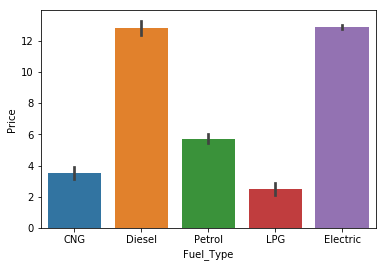

In [278]:
#fuel type and transmission based on year

#average price based on fuel type

sns.barplot(data.Fuel_Type, data.Price)

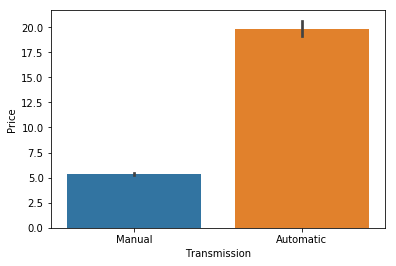

In [279]:
sns.barplot(data.Transmission, data.Price)

In [280]:
#Automatic cars price iws high

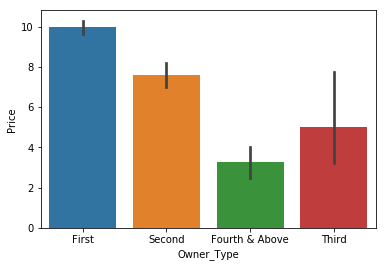

In [281]:
sns.barplot(data.Owner_Type, data.Price)

In [282]:
data.Year = data.Year.astype(object)

In [283]:
data.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [284]:
data.groupby(by = ["Fuel_Type","Transmission"]).count()

Name  Location  Year  Kilometers_Driven  Owner_Type  \
Fuel_Type Transmission                                                        
CNG       Manual          56        56    56                 56          56   
Diesel    Automatic     1108      1108  1108               1108        1108   
          Manual        2097      2097  2097               2097        2097   
Electric  Automatic        2         2     2                  2           2   
LPG       Manual          10        10    10                 10          10   
Petrol    Automatic      610       610   610                610         610   
          Manual        2136      2136  2136               2136        2136   

                        Mileage  Engine  Power  Seats  New_Price  Price  
Fuel_Type Transmission                                                   
CNG       Manual             56      56     56     56          9     56  
Diesel    Automatic        1108    1101   1101   1100        193   1108  
          Manual           2097    2096   2096   2095        250   2097  
Electric  Automatic           0       2      2      2          1      2  
LPG       Manual             10      10     10     10          0     10  
Petrol    Automatic         610     609    609    609        118    610  
          Manual           2136    2109   2109   2105        253   2136

In [285]:
# all cng & lpg are manual


# all electric are automatic

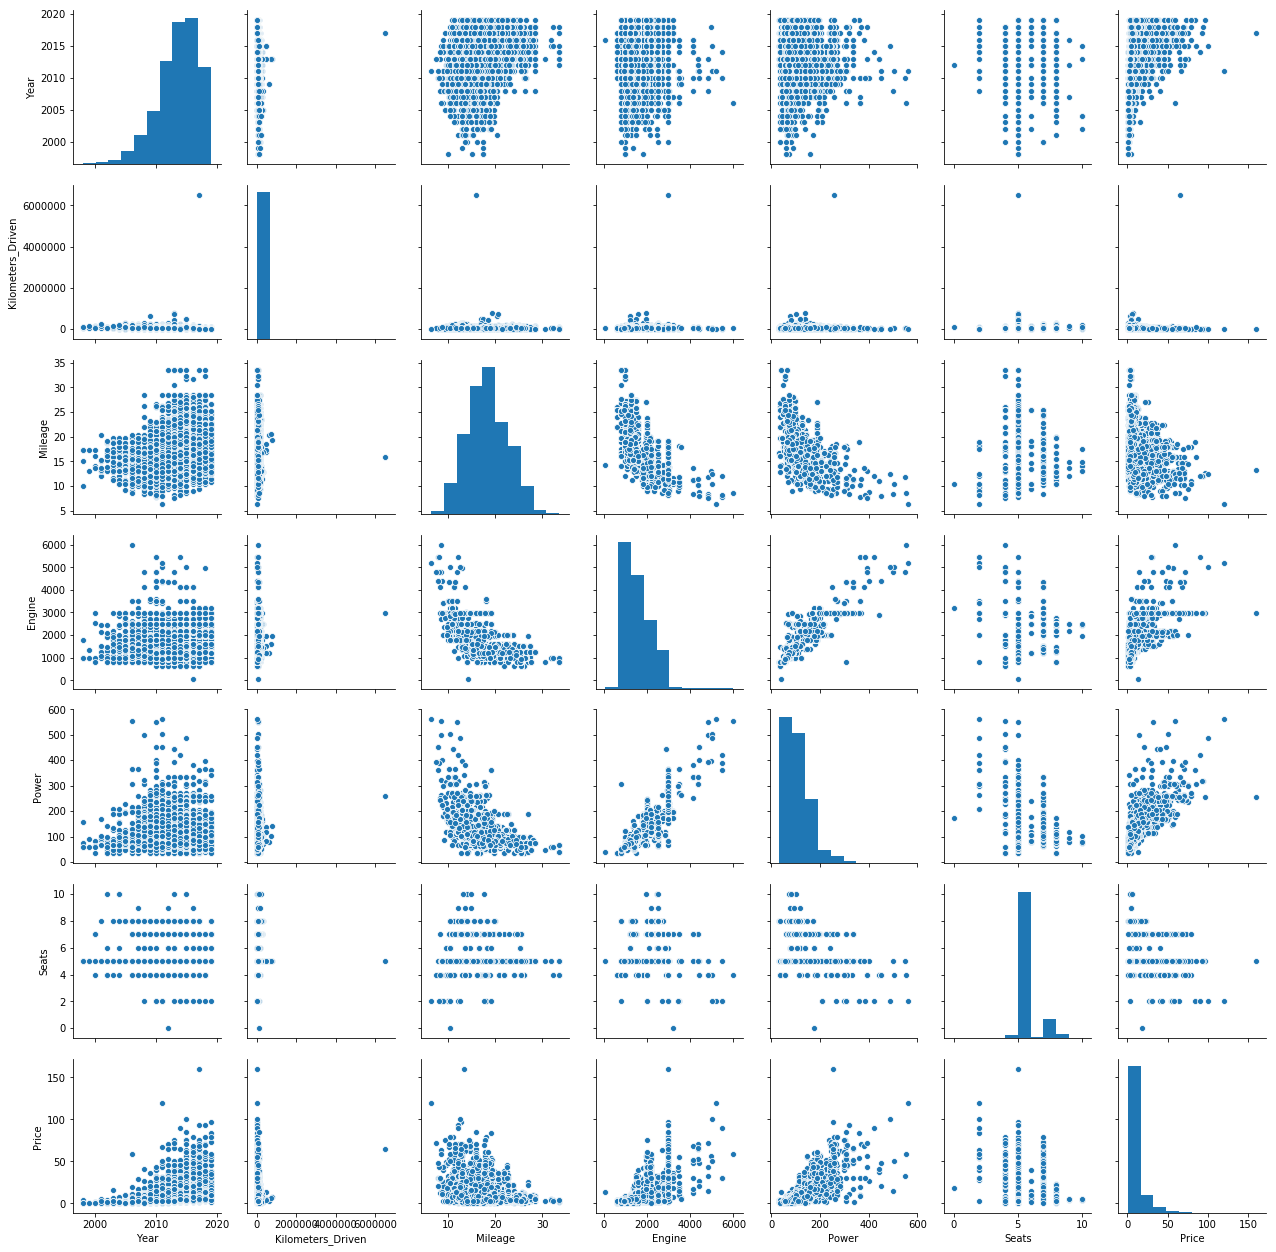

In [286]:
sns.pairplot(data_new)

In [287]:
# Engine and power 
# Power and price
# have high positive correlation

## Model Creation

In [288]:
## Linear Regression

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [290]:
data_mod.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_North,Fuel_Type_CNG,Fuel_Type_Diesel,...,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Name_Ford,Name_Honda,Name_Hyundai,Name_Maruti,Name_Mercedes-Benz,Name_Toyota,Name_Volkswagen
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,1,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [291]:
x = data_mod.drop("Price", axis = 1)
y = data_mod.Price

print(x.shape, y.shape)

(6019, 22) (6019,)


In [292]:
x_sc = pd.DataFrame(MinMaxScaler().fit_transform(x) , columns= x.columns)
x_sc.head()

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_North,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,...,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Name_Ford,Name_Honda,Name_Hyundai,Name_Maruti,Name_Mercedes-Benz,Name_Toyota,Name_Volkswagen
0,0.571429,0.011051,0.744289,0.156261,0.045569,0.5,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.809524,0.006282,0.488946,0.254809,0.174971,0.5,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.619048,0.007051,0.434783,0.190179,0.103652,0.5,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.013359,0.529477,0.198448,0.103766,0.7,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.714286,0.006231,0.324245,0.319946,0.202739,0.5,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
x_train, x_test, y_train, y_test = train_test_split(x_sc,y,test_size = 0.3, random_state = 101)

In [294]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)

In [295]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [296]:
lr.intercept_

0.6526941575273

In [297]:
lr.coef_

array([ 20.19845081,  13.74096512,  -3.32407122,   7.52656938,
        66.7802592 , -10.43718675,  -1.4956473 ,  -8.02170407,
        -8.39924182,  -6.20255467,  -9.8350735 ,   1.65783093,
        -1.41615032,  -2.08412993,  -0.06814914,  -0.6242486 ,
        -2.62286619,  -0.94572985,   1.04479023,   4.09016617,
        -0.14942242,  -1.98637177])

In [298]:
#MSE

from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test , pred_test)
print("mse on test: ", mse_test)

mse_train = mean_squared_error(y_train , pred_train)
print("mse on train", mse_train)

mse on test:  34.911408819292255
mse on train 36.22662180674213


In [299]:
# R squared

print("r squared on train", lr.score(x_train, y_train))
print("r squared on test", lr.score(x_test, y_test))

r squared on train 0.7170949018475974
r squared on test 0.7050427674104545


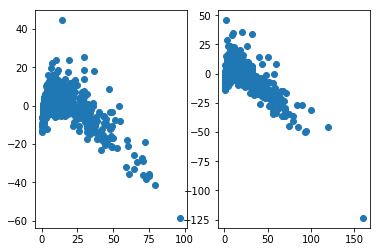

In [300]:
#Residual plot

fig , axes = plt.subplots(1,2)

#plt.scatter(y_test, pred_test-y_test)

axes[0].scatter(y_test, pred_test-y_test)
axes[1].scatter(y_train, pred_train-y_train)

In [301]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor().fit(x_train,y_train)
test_pred = dt.predict(x_test)

print(mean_squared_error(y_test, test_pred))
print(mean_squared_error(y_train, dt.predict(x_train)))
print(dt.score(x_test, y_test))
print(dt.score(x_train, y_train))

35.04551937984496
0.005170769048184193
0.7039097028582213
0.9999596198361276


In [302]:
from sklearn.ensemble import RandomForestRegressor

rf  = RandomForestRegressor(n_estimators= 25)
rf.fit(x_train, y_train)

print(mean_squared_error(y_test, rf.predict(x_test)))
print(mean_squared_error(y_train, rf.predict(x_train)))
print(rf.score(x_test, y_test))
print(rf.score(x_train, y_train))

15.106273082162835
2.3669906635484548
0.8723711057860707
0.9815154244972305


In [303]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [304]:
gbr = GradientBoostingRegressor(n_estimators= 1000, subsample=0.5, max_features= 5 , random_state=50, learning_rate=0.1)
gbr.fit(x_train, y_train)


print(mean_squared_error(y_test, gbr.predict(x_test)))
print(mean_squared_error(y_train, gbr.predict(x_train)))
print(gbr.score(x_test, y_test))
print(gbr.score(x_train, y_train))

10.295425770954253
2.8795897235521517
0.9130166786035386
0.9775123770103081


In [305]:
abr = AdaBoostRegressor(DecisionTreeRegressor(max_features = 3), n_estimators=1000, learning_rate= 0.001, random_state=101)
abr.fit(x_train, y_train)

print(mean_squared_error(y_test, abr.predict(x_test)))
print(mean_squared_error(y_train, abr.predict(x_train)))
print(abr.score(x_test, y_test))
print(abr.score(x_train, y_train))

12.08722546757721
0.005170875860431998
0.8978782382556761
0.9999596190019971


In [306]:
#Perform GridSearch

In [307]:
#xgboost
import xgboost as xgb

In [308]:
xgb_m = xgb.XGBRegressor(n_estimators=1000, max_depth=2, learning_rate= 0.5)
xgb_m.fit(x_train, y_train)

print(mean_squared_error(y_test, xgb_m.predict(x_test)))
print(mean_squared_error(y_train, xgb_m.predict(x_train)))
print(xgb_m.score(x_test, y_test))
print(xgb_m.score(x_train, y_train))

[14:51:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


10.888747892464831
1.9315280496398834
0.908003857382236
0.9849160891848383


In [309]:
#Grid search cv on xgboost

from sklearn.model_selection import GridSearchCV



In [310]:
# grid = {"n_estimators":[10,25,50,100,300,500,750,1000,1500], 
#         "max_depth": [3,5,7,10],
#         "min_child_weight":[1,2,3,4,5],
#         "gamma":[i/10.0 for i in range(0,5)],
#         'subsample':[0.5,0.6,0.7,0.8,0.9],
#         "learning_rate":[0.01, 0.05,0.1,0.2,0.3]
#        }

In [311]:
# grid = {"n_estimators":[50,100,250,500,1000], 
#         "max_depth": [3,5,7,10],
#         "min_child_weight":[1,3,5],
#         "gamma":[0,2,5],
#         'subsample':[0.5,0.7,0.9],
#         "learning_rate":[0.01,0.05,0.1,0.3]
#        }

# gs = GridSearchCV(estimator= xgb.XGBRegressor(), param_grid= grid , scoring = "neg_mean_squared_error", n_jobs=-1)
# gs.fit(x_train, y_train)

# print(gs.best_params_)
# print(gs.best_score_)

In [312]:
# print(mean_squared_error(y_test, gs.predict(x_test)))
# print(mean_squared_error(y_train, gs.predict(x_train)))
# print(gs.score(x_test, y_test))
# print(gs.score(x_train, y_train))

In [313]:
xgb_m = xgb.XGBRegressor(gamma= 2,
 learning_rate= 0.05,
 max_depth= 10,
 min_child_weight= 3,
 n_estimators= 100,
 subsample= 0.7)
xgb_m.fit(x_train, y_train)

print(mean_squared_error(y_test, xgb_m.predict(x_test)))
print(mean_squared_error(y_train, xgb_m.predict(x_train)))
print(xgb_m.score(x_test, y_test))
print(xgb_m.score(x_train, y_train))

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:51:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
10.661093153844222
2.673048200078978
0.9099272518816389
0.9791253248110287


In [338]:
xgb_m.predict(x_train)

array([2.023158 , 4.361876 , 5.7342715, ..., 3.5468059, 3.4755182,
       3.6970105], dtype=float32)

In [339]:
y_train

4326      1.55
301       3.89
3470      5.55
678       5.25
5361      3.45
1558      7.23
3551      0.80
4669      7.50
4935     14.00
588       5.75
1098      2.80
5174      3.00
4482      1.60
913      43.74
2483      7.10
3064      5.99
1812      7.95
1433      0.75
915       3.00
3911     20.75
90        5.00
853      10.99
1337      8.40
5178      3.80
243       6.90
1966      4.74
3089      3.50
143       1.67
3081      4.00
268       2.00
         ...  
3912     12.50
1580      1.65
5538     17.75
2107      5.80
2931      4.30
1949      4.45
4467      2.90
2184      3.90
1530      4.25
4719     10.90
5971      3.50
49        5.50
4573      6.00
908       5.00
3182      4.50
5824      2.45
4828      4.80
3829      9.50
5032      6.95
2623     18.00
5764      2.30
5672      6.99
973       1.25
4079    160.00
4171      5.85
599      24.82
5695      5.75
1361      3.60
1547      3.10
4959      3.25
Name: Price, Length: 4213, dtype: float64

In [325]:
#Test data

data_test = pd.read_excel("Data_Test.xlsx")
data_test.shape

(1234, 12)

In [326]:
data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [337]:
data_test.Location.value_counts()

Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: Location, dtype: int64

In [327]:
#data processing on test data

import numpy as np

test_data_new = data_test.drop("New_Price", axis =1)
test_data_new.Mileage = test_data_new.Mileage.str.split(" ").str.get(0)
test_data_new.Mileage = test_data_new.Mileage.astype(float)
test_data_new.Engine = test_data_new.Engine.str.split(" ").str.get(0)




In [328]:
test_data_new[test_data_new.Power == "null"].Power

Series([], Name: Power, dtype: object)

In [329]:
test_data_new.Power = test_data_new.Power.str.split(" ").str.get(0)
test_data_new.replace("null",np.nan, inplace= True)
test_data_new.Power = test_data_new.Power.astype(np.float)

In [330]:
test_data_new.Power

0        58.20
1        47.30
2       147.80
3          NaN
4        82.85
5       140.00
6       168.70
7        55.20
8       118.00
9       140.00
10      167.60
11       82.00
12      125.00
13       75.00
14      102.50
15      184.00
16      184.00
17       68.00
18       81.80
19       85.80
20       73.94
21       75.00
22       47.30
23         NaN
24      132.00
25       70.00
26       46.30
27       98.60
28      103.52
29       80.00
         ...  
1204    147.90
1205     67.00
1206    157.80
1207     62.00
1208     65.00
1209     69.00
1210    103.60
1211     81.83
1212    121.36
1213    160.00
1214    147.51
1215    121.30
1216     88.50
1217     81.86
1218     98.60
1219    147.51
1220     86.70
1221     98.60
1222    218.00
1223     82.00
1224     83.80
1225     92.70
1226     86.70
1227     82.00
1228     55.20
1229    103.60
1230    103.60
1231     63.10
1232    103.60
1233    170.00
Name: Power, Length: 1234, dtype: float64

In [332]:
test_data_new.Engine = test_data_new.Engine.astype(np.float)
test_data_new.replace(["Hyderabad","Kochi","Coimbatore","Bangalore","Chennai"],"South", inplace = True)
test_data_new.replace(["Mumbai","Pune","Ahmedabad","Delhi","Jaipur","Kolkata"],"North", inplace = True)
test_data_mod = pd.get_dummies(test_data_new,columns = ["Location","Fuel_Type","Transmission","Owner_Type"])
test_data_mod.Name = test_data_new.Name.str.split(" ").str.get(0)

test_list = [name for name in test_data_mod.Name.unique() if name not in ['Maruti','Hyundai','Honda','Toyota','Volkswagen','Mercedes-Benz','Ford']]

test_data_mod.replace(test_list,"Others",inplace=True)
test_data_mod = pd.get_dummies(test_data_mod, columns=["Name"])
test_data_mod.drop(['Location_South','Transmission_Manual','Owner_Type_Fourth & Above','Name_Others' ], axis =1, inplace=True)

In [ ]:
test_data_mod.head()

In [333]:
test_data_mod.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_North', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Owner_Type_First',
       'Owner_Type_Second', 'Owner_Type_Third', 'Name_Ford', 'Name_Honda',
       'Name_Hyundai', 'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Toyota',
       'Name_Volkswagen'],
      dtype='object')

In [334]:
x_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_North', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Owner_Type_First',
       'Owner_Type_Second', 'Owner_Type_Third', 'Name_Ford', 'Name_Honda',
       'Name_Hyundai', 'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Toyota',
       'Name_Volkswagen'],
      dtype='object')

In [ ]:
data_mod.head()

In [345]:
test_data_pred = xgb_m.predict(pd.DataFrame(MinMaxScaler().fit_transform(test_data_mod),columns = test_data_mod.columns))

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [348]:
df = pd.DataFrame(test_data_pred, columns=["Price"])

In [349]:
df

,Price
0,3.647782
1,2.069443
2,13.569388
3,2.541161
4,3.073464
5,9.662661
6,14.687251
7,2.241262
8,4.173208
9,9.184625


In [352]:
df.to_excel("Price.xlsx" )